# Ujian Tengah Semester (UTS)

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi.

1.   Metode Naive Bayes Classifier
2.   Metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

**Metode Naive Bayes Classifier**

Import library penting yang dibutuhkan.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

Mengambil informasi data pada file CSV (dataR2.csv)

In [ ]:
Data = pd.read_csv("https://raw.githubusercontent.com/astnrhy30/datamining/main/dataR2.csv")

Menampilkan/membaca dataset.

In [ ]:
Data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Lakukan konversi pengkategorian variabel (tipe data string/nominal) untuk variabel lanjutan.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Inisialisasi fungsi
Age_le=le.fit_transform(Data.Age)
BMI_le = le.fit_transform(Data.BMI)
Glucose_le = le.fit_transform(Data.Glucose)
HOMA_le = le.fit_transform(Data.HOMA)
Resistin_le = le.fit_transform(Data.Resistin)
Insulin_le = le.fit_transform(Data.Insulin)
Leptin_le = le.fit_transform(Data.Leptin)
Adiponectin_le = le.fit_transform(Data.Adiponectin)
MCP1_le = le.fit_transform(Data.MCP1)

Data["Age_le"]=Age_le
Data["BMI_le"]=BMI_le
Data["Glucose_le"]=Glucose_le
Data["HOMA_le"]=HOMA_le
Data["Resistin_le"]=Resistin_le
Data["Insulin_le"]=Insulin_le
Data["Leptin_le"]=Leptin_le
Data["Adiponectin_le"]=Adiponectin_le
Data["MCP1_le"]=MCP1_le

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification,Age_le,BMI_le,Glucose_le,HOMA_le,Resistin_le,Insulin_le,Leptin_le,Adiponectin_le,MCP1_le
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,17,33,1,0,37,3,14,68,53
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,47,5,19,13,4,9,15,26,57
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,46,30,18,34,45,33,50,108,67
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,35,14,5,7,66,11,21,41,104
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,49,11,19,23,56,19,4,20,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,14,50,19,18,58,12,106,87,27
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,30,49,27,43,33,34,30,105,38
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,32,89,24,56,53,51,108,109,35
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,38,41,9,4,1,5,68,112,48


Drop kolom dengan tipe data kategorikal dari dataframe.

In [ ]:
Data = Data.drop(["Age", "BMI", "Glucose", "Insulin", "HOMA", "Leptin", "Adiponectin", "Resistin", "MCP1", "Classification"], axis=1)
Data

,Age_le,BMI_le,Glucose_le,HOMA_le,Resistin_le,Insulin_le,Leptin_le,Adiponectin_le,MCP1_le
0,17,33,1,0,37,3,14,68,53
1,47,5,19,13,4,9,15,26,57
2,46,30,18,34,45,33,50,108,67
3,35,14,5,7,66,11,21,41,104
4,49,11,19,23,56,19,4,20,93
...,...,...,...,...,...,...,...,...,...
111,14,50,19,18,58,12,106,87,27
112,30,49,27,43,33,34,30,105,38
113,32,89,24,56,53,51,108,109,35
114,38,41,9,4,1,5,68,112,48



Menetapkan x (variabel bebas).

In [ ]:
x = Data.iloc[:, 0:3]
x.head(10)

,Age_le,BMI_le,Glucose_le
0,17,33,1
1,47,5,19
2,46,30,18
3,35,14,5
4,49,11,19
5,18,25,19
6,50,23,5
7,42,35,39
8,39,17,24
9,41,28,10


Menetapkan y (variabel bebas).

In [ ]:
y = Data.iloc[:, 8:]
y.head(10)

,MCP1_le
0,53
1,57
2,67
3,104
4,93
5,64
6,111
7,30
8,5
9,36


Pisahkan data menjadi train dat test spilt.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

Model bangunan dengan Sklearn.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB() #Inisialisasi fungsi
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Akurasi Skor.

In [ ]:
y_predict=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict, normalize=True)

0.0

Mari kita prediksi suatu data termasuk ke dalam kelas apa dengan (ya atau tidak) pada pilihan kelas 1,2.

In [ ]:
model.predict([[20, 25, 39]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([112])

### **Metode pohon keputusan (Decision tree)**

Import/ambil library untuk membangun Decision Tree pada Python.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import tree

Tampilkan/baca data.

In [ ]:
Data2 = pd.read_csv("https://raw.githubusercontent.com/astnrhy30/datamining/main/dataR2.csv")

Tampilkan 5 baris teratas dari dataset tersebut dengan menggunakan fungsi head().

In [ ]:
Data2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Mengambil nilai y sebagai variabel bebas yang akan menentukan jenis kelompoknya.

In [ ]:
y = Data2["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

Mengambil nilai x sebagai variabel terikat yang berpengaruh ke kelas klasifikasinya.

In [ ]:
X = Data2.drop(columns=["Classification"])
x.head()

,Age_le,BMI_le,Glucose_le
0,17,33,1
1,47,5,19
2,46,30,18
3,35,14,5
4,49,11,19


Train model tersebut dengan menggunakan decision tree klasifikasi.

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

Menampilkan pohon percabangan

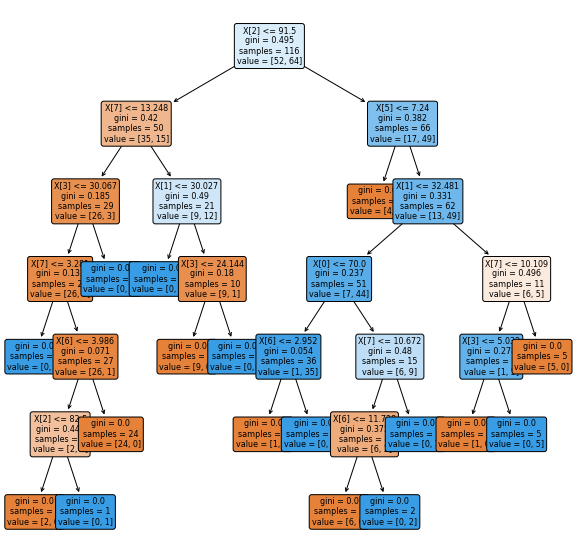

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()